In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
data=pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\Decision Tree\Practise Code\bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.shape

(11162, 17)

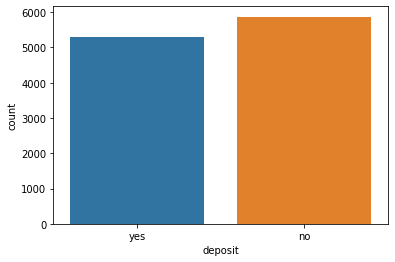

In [5]:
sns.countplot(x="deposit",data=data)
plt.show()

In [6]:
data["deposit"].value_counts()

# From the observation it is seen that , given data is balanced data.

no     5873
yes    5289
Name: deposit, dtype: int64

In [7]:
data.index

RangeIndex(start=0, stop=11162, step=1)

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# To check the missing values

In [9]:
data.isnull().sum()

# No missing values is data set


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# To check for the outliers
    


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
data.quantile([0.01,0.99])

,age,balance,day,duration,campaign,pdays,previous
0.01,22.0,-522.00,1.0,14.00,1.0,-1.00,0.0
0.99,77.0,13226.98,31.0,1577.17,13.0,425.39,10.0


In [12]:
# For flooring(lower side)
data["balance"]=np.where(data["balance"]<-522,data["balance"].quantile(0.01),data["balance"])
data["duration"]=np.where(data["duration"]<14,data["duration"].quantile(0.01),data["duration"])


# for tapping(Upper side)
data["age"]=np.where(data["age"]>77,data["age"].quantile(0.99),data["age"])  
data["balance"]=np.where(data["balance"]>13226,data["balance"].quantile(0.99),data["balance"]) 
data["duration"]=np.where(data["duration"]>1577,data["duration"].quantile(0.99),data["duration"]) 
data["campaign"]=np.where(data["campaign"]>13,data["campaign"].quantile(0.99),data["campaign"]) 
data["pdays"]=np.where(data["pdays"]>425.39,data["pdays"].quantile(0.99),data["pdays"]) 
data["previous"]=np.where(data["previous"]>10,data["previous"].quantile(0.99),data["previous"])

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.185540,1430.772779,15.658036,368.063433,2.433883,50.111958,0.776384
std,11.756972,2324.020682,8.420740,327.559756,2.176754,103.016608,1.797315
min,18.000000,-522.000000,1.000000,14.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,77.000000,13226.980000,31.000000,1577.170000,13.000000,425.390000,10.000000


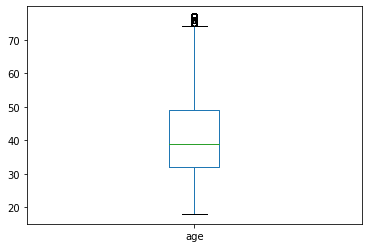

In [14]:
data["age"].plot(kind="box")

# Data PreProcessing

In [15]:
# Label encodeing for categorical variable


In [16]:
from sklearn import preprocessing
def preprocessor(data):
    res_df = data.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [17]:
encoded_df = preprocessor(data)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,1042.0,1.0,-1.0,0.0,3,1
1,56.0,0,1,1,0,45.0,0,0,2,5,8,1467.0,1.0,-1.0,0.0,3,1
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,1389.0,1.0,-1.0,0.0,3,1
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.0,0.0,3,1
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.0,0.0,3,1


In [18]:
# Decide dependent & independent variable
x=encoded_df.drop("deposit",axis=1).values
y=encoded_df["deposit"].values

In [19]:
# Splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# Decision Tree model

In [20]:
# Decision Tree model with gini
# depth = 2
# Criterion=gini

from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(criterion="gini",max_depth=2)

model1.fit(x_train,y_train)

model1_score_train = model1.score(x_train,y_train)

model1_score_test = model1.score(x_test,y_test)

print('Training Score',model1_score_train)

print('Testing Score',model1_score_test)

Training Score 0.7146376973905253
Testing Score 0.6950291088222122


In [21]:
# Decision Tree model with gini
# depth = 4
# Criterion=gini

from sklearn.tree import DecisionTreeClassifier

model2=DecisionTreeClassifier(criterion="gini",max_depth=4)


model2.fit(x_train,y_train)

model2_score_train = model2.score(x_train,y_train)

model2_score_test = model2.score(x_test,y_test)

print('Training Score',model2_score_train)

print('Testing Score',model2_score_test)

Training Score 0.7958337999776011
Testing Score 0.7890729959695477


In [22]:
# Decision Tree model with gini
# depth = 6
# Criterion=gini

from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion="gini",max_depth=6)
model3.fit(x_train,y_train)
model3_score_train = model3.score(x_train,y_train)

model3_score_test = model3.score(x_test,y_test)

print('Training Score',model3_score_train)

print('Testing Score',model3_score_test)


# From the observation it has been concluded that, Training & Testing accuracy will be nearly same 
# hence Data is perfectly fitted into the model.
# Hence No need to do cross validation to avoid overfitting.

Training Score 0.8262963377757868
Testing Score 0.8038513210927004


In [23]:
# Decision Tree model with gini
# depth = 6
# Criterion=Entropy

from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion="entropy",max_depth=6)
model4.fit(x_train,y_train)
model4_score_train = model4.score(x_train,y_train)

model4_score_test = model4.score(x_test,y_test)

print('Training Score',model4_score_train)

print('Testing Score',model4_score_test)



Training Score 0.8170007839623699
Testing Score 0.793551276309897


# Graphical Representation of a tree

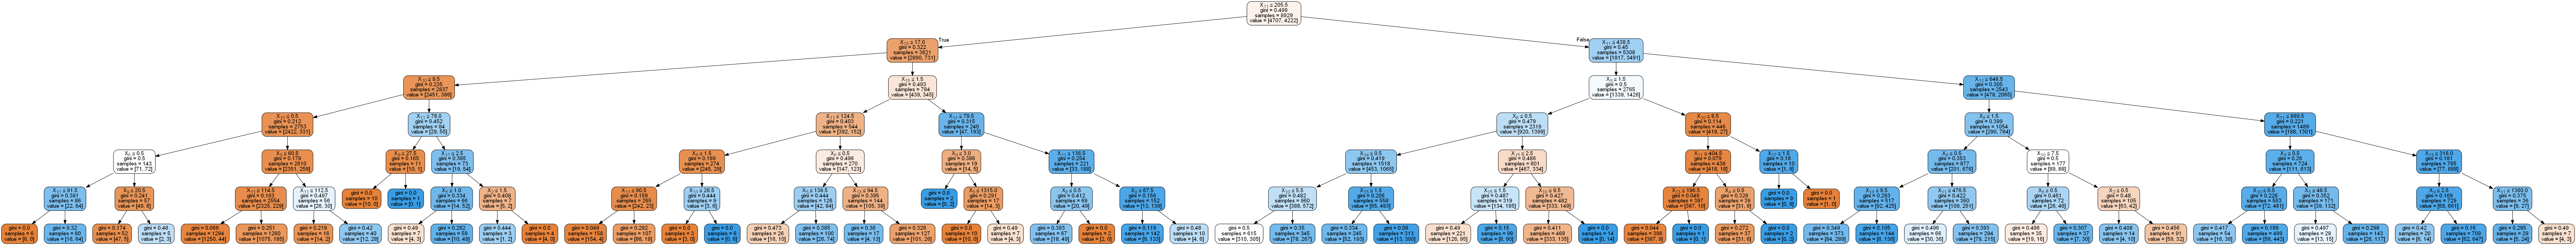

<Figure size 432x288 with 0 Axes>

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

plt.figure(figsize=(6,4))
dot_data = StringIO()
export_graphviz(model3,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [26]:
conda install python-Graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


# Performance Matrics

In [38]:
y_pred_dt = model3.predict_proba(x_test)[:,1]
print(y_pred_dt)

y_predict=model3.predict(x_test)
print(y_predict)

[0.7        0.91255289 0.54545455 ... 0.02531646 0.94444444 0.20472441]
[1 1 1 ... 0 1 0]


In [41]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test,y_predict)
conf_matrix

array([[972, 194],
       [244, 823]], dtype=int64)

In [44]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

print("Precision:",metrics.precision_score(y_test, y_predict))

print("Recall:",metrics.recall_score(y_test, y_predict))


Accuracy: 0.8038513210927004
Precision: 0.8092428711897739
Recall: 0.7713214620431116


# ROC & AUC Curve

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

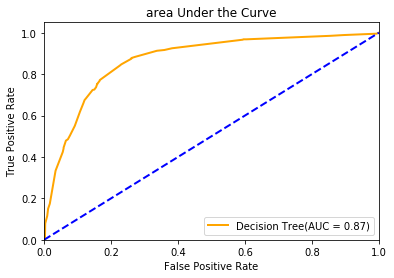

In [66]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
#plt.legend(loc="upper left")
plt.legend(loc="lower right")

# prunning of the Tree


In [55]:
from sklearn.tree._tree import TREE_LEAF
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min()<threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children visit them as well
    if inner_tree.children_left[index] !=TREE_LEAF:
        prune_index(inner_tree,inner_tree.children_left[index],threshold)
        prune_index(inner_tree,inner_tree.children_right[index],threshold)
        
print(sum(model3.tree_.children_left<0))
# start pruning from the root
prune_index(model3.tree_,0,5)
sum(model3.tree_.children_left<0)

# it means that the code has created(352-297)=55 new leaf nodes
# (by practically removing links to their ancesters). The tree, which has looked before like



59


64

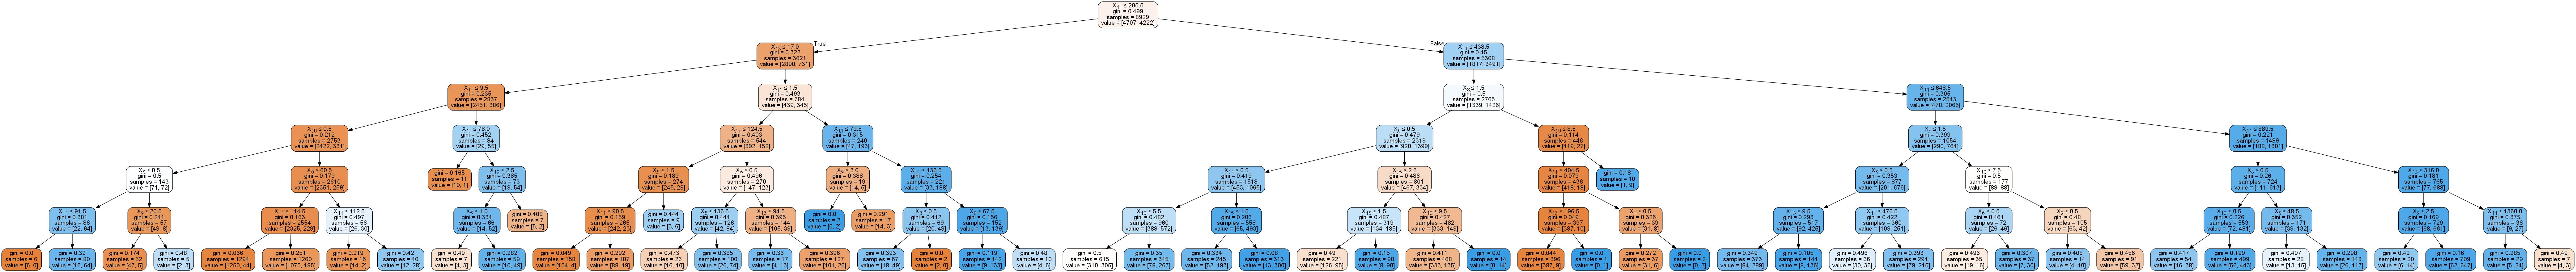

<Figure size 720x576 with 0 Axes>

In [60]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph1.write_pdf('pruning.pdf')
graph1.write_png('pruning.png')
Image(graph1.create_jpg())